In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
IMG_SIZE=224
BATCH_SIZE=32

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [16]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzhemier/data',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 522 images belonging to 4 classes.


In [17]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/alzhemier/data',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Changed from 'categorical' to 'sparse'
    subset='validation'
)

Found 130 images belonging to 4 classes.


In [18]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print(class_indices)

{'MildDemented': 0, 'ModerateDemented': 1, 'Non Demented': 2, 'Very Mild Demented': 3}


In [19]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(train_generator,epochs=9,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3286 - loss: 1.4465

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.3297 - loss: 1.4412 - val_accuracy: 0.3077 - val_loss: 1.4312
Epoch 2/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.3777 - loss: 1.2381 - val_accuracy: 0.4154 - val_loss: 1.1941
Epoch 3/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.5221 - loss: 1.0053 - val_accuracy: 0.5615 - val_loss: 1.1342
Epoch 4/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6400 - loss: 0.7896 - val_accuracy: 0.6231 - val_loss: 0.8869
Epoch 5/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6662 - loss: 0.7702 - val_accuracy: 0.6692 - val_loss: 0.7921
Epoch 6/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7388 - loss: 0.6362 - val_accuracy: 0.6846 - val_loss: 0.7399
Epoch 7/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.7933 - loss: 0.5201 - val_accuracy: 0.7615 - val_loss: 0.6118
Epoch 8/9
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8829 - loss: 0.3421 - val_accuracy: 0.8000 - val_loss: 0.4

In [23]:
model.save('/content/drive/MyDrive/alzhemier_model.h5')

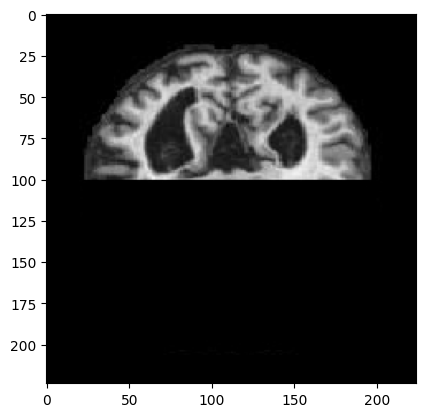

In [33]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

test_image_path="/content/drive/MyDrive/alzhemier/data/MildDemented/mildDem137.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [35]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255



In [36]:
prediction=model.predict(img_array)
print(prediction)
ind=np.argmax(prediction)
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
[[9.9727613e-01 1.2112670e-03 1.3311947e-05 1.4993468e-03]]
MildDemented


In [ ]:
model.fit(train_generator,epochs=10,validation_data=val_generator,batch_size=BATCH_SIZE)